##Downloading the IMF WEO Database
You can download the entire IMF World Economic Outlook (WEO) dataset using Python with the help of the `weo-reader` package. This will download the WEO dataset for April 2024 and save it as a CSV file named `weo.csv`.

More on the `weo-reader` package can be found here [weo-reader documentation on GitHub](https://github.com/epogrebnyak/weo-reader)².


Critical links;
(1) weo · PyPI. https://pypi.org/project/weo/.
(2) GitHub - epogrebnyak/weo-reader: Python client to read IMF World .... https://github.com/epogrebnyak/weo-reader.
(3) imf-reader - PyPI. https://pypi.org/project/imf-reader/.
(4) weo 0.7.4 on PyPI - Libraries.io. https://libraries.io/pypi/weo.
(5) undefined. https://github.com/epogrebnyak/weo-reader.git.

The command below downloads the IMF WEO of your choosing to a folder of your choice

In [1]:


from weo import download, WEO
import os

# Get home directory path
home = os.path.expanduser("/Users/janai/Documents/Documents – Janai’s MacBook Air/Personal Files/Learnings/GitHub/Downloading-World-Bank-and-IMF-Databases/Output")# change this to your folder path
download_path = os.path.join(home, 'weo.csv')

# Download the file. You can change year and release data here.
path, url = download(year=2025, release='Apr', filename=download_path)

# Load and preview data
weo_data = WEO(download_path)
weo_df = weo_data.df
print("\nFirst few rows of the data:")
print(weo_df.head())

/Users/janai/Documents/Documents – Janai’s MacBook Air/Personal Files/Learnings/GitHub/Downloading-World-Bank-and-IMF-Databases/Output/weo.csv 19.3Mb
Downloaded 2025-Apr WEO dataset

First few rows of the data:
  WEO Country Code  ISO WEO Subject Code      Country  \
0              512  AFG           NGDP_R  Afghanistan   
1              512  AFG        NGDP_RPCH  Afghanistan   
2              512  AFG             NGDP  Afghanistan   
3              512  AFG            NGDPD  Afghanistan   
4              512  AFG           PPPGDP  Afghanistan   

                        Subject Descriptor  \
0  Gross domestic product, constant prices   
1  Gross domestic product, constant prices   
2   Gross domestic product, current prices   
3   Gross domestic product, current prices   
4   Gross domestic product, current prices   

                                       Subject Notes  \
0  Expressed in billions of national currency uni...   
1  Annual percentages of constant price GDP are y...   
2

To limit the code to only a few countries note the following code

In [ ]:
import pandas as pd
# If you wanted to limit to a few countries you can enter the country names here.
weo_filter_df = pd.DataFrame({
    'Country': ['United States', 'China', 'Japan'],
    'WEO Subject Code': ['NGDP_RPCH', 'PCPIPCH', 'BCA']
})

# Merge and filter
filtered_weo = pd.merge(
    weo_df, 
    weo_filter_df, 
    how='inner',
    on=['Country', 'WEO Subject Code']
)

print("Original shape:", weo_df.shape)
print("Filtered shape:", filtered_weo.shape)
print("\nFirst few rows of filtered data:")
print(filtered_weo.head())

This filtered file can also be downloaded to a folder of your choice

In [ ]:
import os

# Get home directory and create export path
home_filter = os.path.expanduser("/Users/")# change this to your folder path
export_path_filter = os.path.join(home_filter, 'filtered_weo.csv')

# Export to CSV
filtered_weo.to_csv(export_path_filter, index=False)
print(f"Data exported to: {export_path_filter}")




To plot directly from the data have a look at the example below

In [91]:
w=WEO('weo.csv')

<Axes: title={'center': 'GDP by country, USD billion (2024)'}>

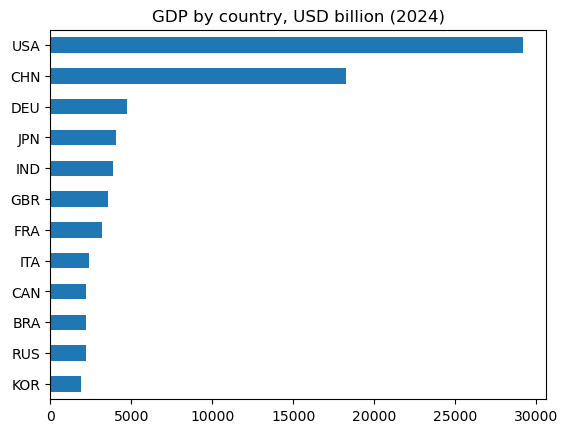

In [93]:
(w.gdp_usd(2024)
  .dropna()
  .sort_values()
  .tail(12)
  .plot
  .barh(title="GDP by country, USD billion (2024)")
)